In [2]:
import pandas as pd
from pandas_datareader import data
import numpy as np

import datetime

import matplotlib
import matplotlib.colors as colors
import matplotlib.finance as finance
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [3]:
today = enddate = datetime.date.today()
startdate = enddate - datetime.timedelta(days=240)# datetime.date(2006, 1, 1)
asset = 'AAPL'

In [4]:
# Spec: Stock data should be pulled from finance.yahoo
ticker = data.DataReader(asset, data_source='yahoo', start=startdate, end=enddate)
print(ticker.head())

# Add a new version of the date index for plotting
# convert the datetime64 column in the dataframe to 'float days'
ticker['NumDate'] = mdates.date2num(ticker.index.to_pydatetime())

                 Open       High        Low      Close    Volume  Adj Close
Date                                                                       
2016-05-17  94.550003  94.699997  93.010002  93.489998  46916900  92.511299
2016-05-18  94.160004  95.209999  93.889999  94.559998  42062400  93.570098
2016-05-19  94.639999  94.639999  93.570000  94.199997  30442100  93.213866
2016-05-20  94.639999  95.430000  94.519997  95.220001  32026000  94.223192
2016-05-23  95.870003  97.190002  95.669998  96.430000  38018600  95.420524


In [5]:
ticker.tail()

,Open,High,Low,Close,Volume,Adj Close,NumDate
Date,,,,,,,
2017-01-05,115.919998,116.860001,115.809998,116.610001,22103700,116.610001,736334
2017-01-06,116.779999,118.160004,116.470001,117.910004,31577900,117.910004,736335
2017-01-09,117.949997,119.430000,117.940002,118.989998,33387600,118.989998,736338
2017-01-10,118.769997,119.379997,118.300003,119.110001,24420800,119.110001,736339
2017-01-11,118.739998,119.930000,118.599998,119.750000,27418600,119.750000,736340


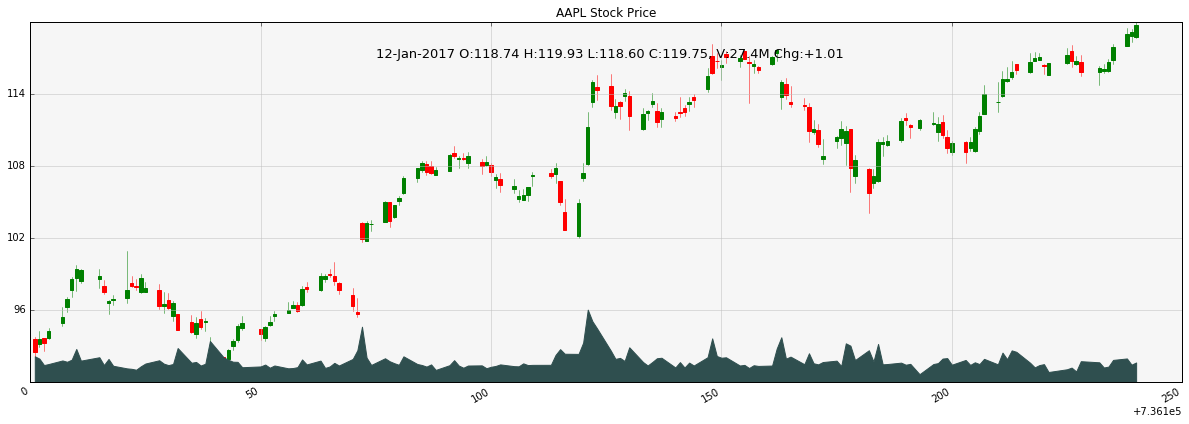

In [6]:
# First we plot our asset's prices

plt.rc('axes', grid=True)
plt.rc('grid', color='0.75', linestyle='-', linewidth=0.5)

textsize = 13
left, width = 0.1, 0.8
# rect1 = [left, 0.7, width, 0.2]
rect2 = [left, 0.3, width, 0.5]
# rect3 = [left, 0.1, width, 0.2]


fig = plt.figure(facecolor='white')
axescolor = '#f6f6f6'  # the axes background color
fillcolor = 'darkslategrey'

# ax1 = fig.add_axes(rect1, axisbg=axescolor)  # left, bottom, width, height
ax2 = fig.add_axes(rect2, axisbg=axescolor)#, sharex=ax1)
ax2t = ax2.twinx()
# ax3 = fig.add_axes(rect3, axisbg=axescolor, sharex=ax2)


# plot the relative strength indicator
prices = ticker["Adj Close"] #.adj_close
# rsi = relative_strength(prices)
# fillcolor = 'darkgoldenrod'

# ax1.plot(r.date, rsi, color=fillcolor)
#ax1.axhline(70, color=fillcolor)
#ax1.axhline(30, color=fillcolor)
#ax1.fill_between(r.date, rsi, 70, where=(rsi >= 70), facecolor=fillcolor, edgecolor=fillcolor)
#ax1.fill_between(r.date, rsi, 30, where=(rsi <= 30), facecolor=fillcolor, edgecolor=fillcolor)
#ax1.text(0.6, 0.9, '>70 = overbought', va='top', transform=ax1.transAxes, fontsize=textsize)
#ax1.text(0.6, 0.1, '<30 = oversold', transform=ax1.transAxes, fontsize=textsize)
#ax1.set_ylim(0, 100)
#ax1.set_yticks([30, 70])
#ax1.text(0.025, 0.95, 'RSI (14)', va='top', transform=ax1.transAxes, fontsize=textsize)
ax2.set_title('%s Stock Price' % asset)

# plot the price and volume data
dx = ticker["Adj Close"] - ticker["Close"]
close = ticker["Close"] + dx
low = ticker["Low"] + dx
high = ticker["High"] + dx
open = ticker["Open"] + dx

candlestick_prices = zip(ticker["NumDate"], open, high, low, close)

deltas = np.zeros_like(prices)
deltas[1:] = np.diff(prices)
up = deltas > 0
matplotlib.finance.candlestick_ohlc(ax2, candlestick_prices, width = 0.75 , colorup = 'g', colordown = 'r')
# ax2.vlines(ticker["NumDate"][up], low[up], high[up], color='green', label='_nolegend_')
# ax2.vlines(ticker["NumDate"][~up], low[~up], high[~up], color='red', label='_nolegend_')
# ma20 = moving_average(prices, 20, type='simple')
# ma200 = moving_average(prices, 200, type='simple')

# linema20, = ax2.plot(r.date, ma20, color='blue', lw=2, label='MA (20)')
# linema200, = ax2.plot(r.date, ma200, color='red', lw=2, label='MA (200)')


last = ticker.tail(1)
s = '%s O:%1.2f H:%1.2f L:%1.2f C:%1.2f, V:%1.1fM Chg:%+1.2f' % (
    today.strftime('%d-%b-%Y'),
    last["Open"], last["High"],
    last["Low"], last["Close"],
    last["Volume"]*1e-6,
    last["Close"] - last["Open"])
t4 = ax2.text(0.3, 0.9, s, transform=ax2.transAxes, fontsize=textsize)

props = font_manager.FontProperties(size=10)
# leg = ax2.legend(loc='center left', shadow=True, fancybox=True, prop=props)
# leg.get_frame().set_alpha(0.5)


volume = (ticker["Adj Close"]*ticker["Volume"])/1e6  # dollar volume in millions
vmax = volume.max()
poly = ax2t.fill_between(ticker["NumDate"], volume, 0, label='Volume', facecolor=fillcolor, edgecolor=fillcolor)
ax2t.set_ylim(0, 5*vmax)
ax2t.set_yticks([])


# turn off upper axis tick labels, rotate the lower ones, etc
for ax in ax2, ax2t: # , ax3 #ax1, 
    for label in ax.get_xticklabels():
        label.set_rotation(30)
        label.set_horizontalalignment('right')

    ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')


class MyLocator(mticker.MaxNLocator):
    def __init__(self, *args, **kwargs):
        mticker.MaxNLocator.__init__(self, *args, **kwargs)

    def __call__(self, *args, **kwargs):
        return mticker.MaxNLocator.__call__(self, *args, **kwargs)

# at most 5 ticks, pruning the upper and lower so they don't overlap
# with other ticks
#ax2.yaxis.set_major_locator(mticker.MaxNLocator(5, prune='both'))
#ax3.yaxis.set_major_locator(mticker.MaxNLocator(5, prune='both'))

ax2.yaxis.set_major_locator(MyLocator(5, prune='both'))
# ax3.yaxis.set_major_locator(MyLocator(5, prune='both'))

plt.show()

In [12]:
# Spec: Each step in calculations of the technical indicators should be explicitly shown
# Define the indicator using functions:

# Aroon: http://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:aroon
# Aroon-Up = ((25 - Days Since 25-day High)/25) x 100
# Aroon-Down = ((25 - Days Since 25-day Low)/25) x 100

def aroon_up(ticker, n=25):
    aroon_up = 100 * pd.stats.moments.rolling_apply(ticker["High"], n + 1, lambda x: x.argmax()) / n
    return aroon_up

def aroon_down(ticker, n=25):
    aroon_down = 100 * pd.stats.moments.rolling_apply(ticker["Low"], n + 1, lambda x: x.argmin()) / n
    return aroon_down

In [13]:
# Spec: Each calculation should be manifested in Pandas dataframes
# Define the indicator parameters for simulation
n = 25

# Compute the indicator values (intermediate and final)
# Add indicator values to DataFrame
ticker["Up"] = aroon_up(ticker, n=n)
ticker["Down"] = aroon_down(ticker, n=n)

ticker.tail()

,Open,High,Low,Close,Volume,Adj Close,NumDate,Up,Down
Date,,,,,,,,,
2017-01-05,115.919998,116.860001,115.809998,116.610001,22103700,116.610001,736334,80,16
2017-01-06,116.779999,118.160004,116.470001,117.910004,31577900,117.910004,736335,100,12
2017-01-09,117.949997,119.430000,117.940002,118.989998,33387600,118.989998,736338,100,8
2017-01-10,118.769997,119.379997,118.300003,119.110001,24420800,119.110001,736339,96,4
2017-01-11,118.739998,119.930000,118.599998,119.750000,27418600,119.750000,736340,100,0


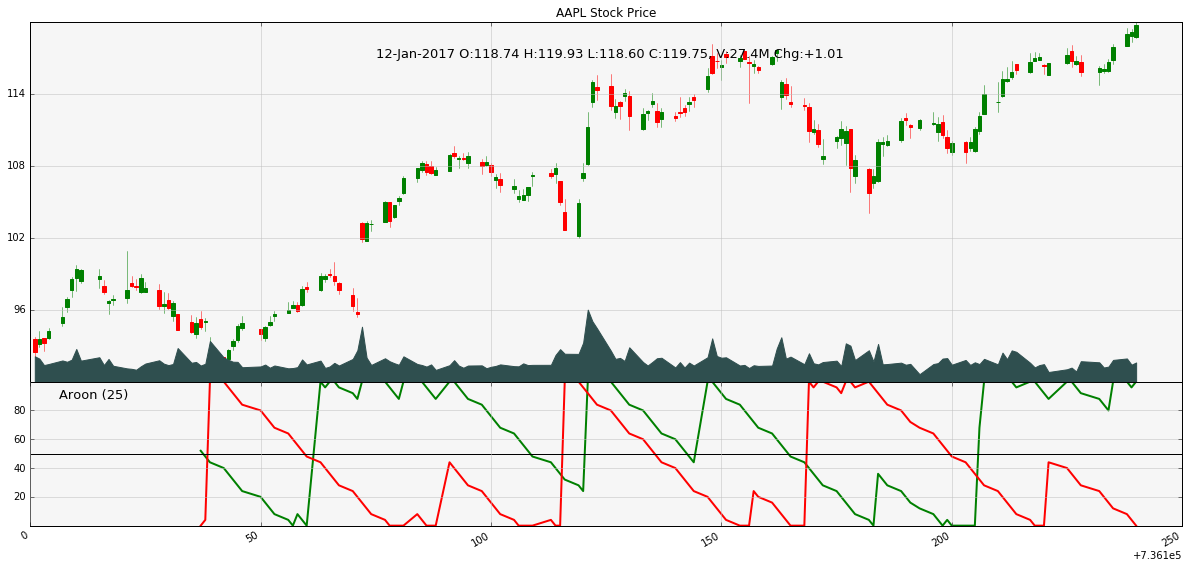

In [14]:
# Next we plot the indicator against our asset's prices

plt.rc('axes', grid=True)
plt.rc('grid', color='0.75', linestyle='-', linewidth=0.5)

textsize = 13
left, width = 0.1, 0.8
# rect1 = [left, 0.7, width, 0.2]
rect2 = [left, 0.3, width, 0.5]
rect3 = [left, 0.1, width, 0.2]


fig = plt.figure(facecolor='white')
axescolor = '#f6f6f6'  # the axes background color
fillcolor = 'darkslategrey'

# ax1 = fig.add_axes(rect1, axisbg=axescolor)  # left, bottom, width, height
ax2 = fig.add_axes(rect2, axisbg=axescolor)#, sharex=ax1)
ax2t = ax2.twinx()
ax3 = fig.add_axes(rect3, axisbg=axescolor, sharex=ax2)


# plot the relative strength indicator
prices = ticker["Adj Close"] #.adj_close
# rsi = relative_strength(prices)
# fillcolor = 'darkgoldenrod'

# ax1.plot(r.date, rsi, color=fillcolor)
#ax1.axhline(70, color=fillcolor)
#ax1.axhline(30, color=fillcolor)
#ax1.fill_between(r.date, rsi, 70, where=(rsi >= 70), facecolor=fillcolor, edgecolor=fillcolor)
#ax1.fill_between(r.date, rsi, 30, where=(rsi <= 30), facecolor=fillcolor, edgecolor=fillcolor)
#ax1.text(0.6, 0.9, '>70 = overbought', va='top', transform=ax1.transAxes, fontsize=textsize)
#ax1.text(0.6, 0.1, '<30 = oversold', transform=ax1.transAxes, fontsize=textsize)
#ax1.set_ylim(0, 100)
#ax1.set_yticks([30, 70])
#ax1.text(0.025, 0.95, 'RSI (14)', va='top', transform=ax1.transAxes, fontsize=textsize)
ax2.set_title('%s Stock Price' % asset)

# plot the price and volume data
dx = ticker["Adj Close"] - ticker["Close"]
close = ticker["Close"] + dx
low = ticker["Low"] + dx
high = ticker["High"] + dx
open = ticker["Open"] + dx

candlestick_prices = zip(ticker["NumDate"], open, high, low, close)

deltas = np.zeros_like(prices)
deltas[1:] = np.diff(prices)
up = deltas > 0
matplotlib.finance.candlestick_ohlc(ax2, candlestick_prices, width = 0.75 , colorup = 'g', colordown = 'r')
# ax2.vlines(ticker["NumDate"][up], low[up], high[up], color='green', label='_nolegend_')
# ax2.vlines(ticker["NumDate"][~up], low[~up], high[~up], color='red', label='_nolegend_')
# ma20 = moving_average(prices, 20, type='simple')
# ma200 = moving_average(prices, 200, type='simple')

# linema20, = ax2.plot(r.date, ma20, color='blue', lw=2, label='MA (20)')
# linema200, = ax2.plot(r.date, ma200, color='red', lw=2, label='MA (200)')


last = ticker.tail(1)
s = '%s O:%1.2f H:%1.2f L:%1.2f C:%1.2f, V:%1.1fM Chg:%+1.2f' % (
    today.strftime('%d-%b-%Y'),
    last["Open"], last["High"],
    last["Low"], last["Close"],
    last["Volume"]*1e-6,
    last["Close"] - last["Open"])
t4 = ax2.text(0.3, 0.9, s, transform=ax2.transAxes, fontsize=textsize)

props = font_manager.FontProperties(size=10)
# leg = ax2.legend(loc='center left', shadow=True, fancybox=True, prop=props)
# leg.get_frame().set_alpha(0.5)


volume = (ticker["Adj Close"]*ticker["Volume"])/1e6  # dollar volume in millions
vmax = volume.max()
poly = ax2t.fill_between(ticker["NumDate"], volume, 0, label='Volume', facecolor=fillcolor, edgecolor=fillcolor)
ax2t.set_ylim(0, 5*vmax)
ax2t.set_yticks([])


# Plot the indicator
ax3.plot(ticker["NumDate"], ticker["Up"], color='green', lw=2)
ax3.plot(ticker["NumDate"], ticker["Down"], color='red', lw=2)
ax3.axhline(y=50, color='black', lw=1)

ax3.text(0.025, 0.95, 'Aroon (%d)' % (n), va='top',
         transform=ax3.transAxes, fontsize=textsize)

# turn off upper axis tick labels, rotate the lower ones, etc
for ax in ax2, ax2t, ax3: #ax1, 
    if ax != ax3:
        for label in ax.get_xticklabels():
            label.set_visible(False)
    else:
        for label in ax.get_xticklabels():
            label.set_rotation(30)
            label.set_horizontalalignment('right')

    ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')


class MyLocator(mticker.MaxNLocator):
    def __init__(self, *args, **kwargs):
        mticker.MaxNLocator.__init__(self, *args, **kwargs)

    def __call__(self, *args, **kwargs):
        return mticker.MaxNLocator.__call__(self, *args, **kwargs)

# at most 5 ticks, pruning the upper and lower so they don't overlap
# with other ticks
#ax2.yaxis.set_major_locator(mticker.MaxNLocator(5, prune='both'))
#ax3.yaxis.set_major_locator(mticker.MaxNLocator(5, prune='both'))

ax2.yaxis.set_major_locator(MyLocator(5, prune='both'))
ax3.yaxis.set_major_locator(MyLocator(5, prune='both'))

plt.show()

In [16]:
# Here we will define the strategy to be tested: long-only RSI
# The strategy is composed of:
#    Outlook: whether the market is bullish, bearish, or neutral
#    Signal: the order to buy or sell

# Spec: Each indicator should have a bullish and bearish entry and exit rules clearly defined
# Define how signals are calculated
def define_outlook(ticker):
    # Default to Hold signal (other options are Buy or Sell)
    ticker["Outlook"] = "Neutral"
    # For now, signal on every crossover. Could be more specific if preferred
    ticker.loc[(ticker["Up"] > 50) & (ticker["Down"] < 50),"Outlook"] = "Bull"
    ticker.loc[(ticker["Up"] < 50) & (ticker["Down"] > 50),"Outlook"] = "Bear"
    
    # Shift the signal by 1 day to avoid look-ahead bias
    ticker.loc[:,"Outlook"] = ticker["Outlook"].shift().fillna("Neutral")
    
    return ticker

# Define how outlook is turned into trade recommendations
def define_signal(ticker):
    # Recode Bull=1, Bear=-1, Neutral=0
    outlook_temp = ticker["Outlook"].replace("Bull",1)
    outlook_temp = outlook_temp.replace("Bear",-1)
    outlook_temp = outlook_temp.replace("Neutral",0)
    trades = outlook_temp.diff().fillna(0)
    # define how trades should happen based on the signal given
    ticker.loc[trades > 0,"Trade"] = "Buy"
    ticker.loc[trades < 0, "Trade"] = "Sell"
    ticker["Trade"] = ticker["Trade"].fillna("Hold")
    return ticker
    
    
# Translate indicator values into bullish/bearish signals
ticker = define_outlook(ticker)
ticker = define_signal(ticker)

ticker.head()

,Open,High,Low,Close,Volume,Adj Close,NumDate,Up,Down,Outlook,Trade
Date,,,,,,,,,,,
2016-05-17,94.550003,94.699997,93.010002,93.489998,46916900,92.511299,736101,NaN,NaN,Neutral,Hold
2016-05-18,94.160004,95.209999,93.889999,94.559998,42062400,93.570098,736102,NaN,NaN,Neutral,Hold
2016-05-19,94.639999,94.639999,93.570000,94.199997,30442100,93.213866,736103,NaN,NaN,Neutral,Hold
2016-05-20,94.639999,95.430000,94.519997,95.220001,32026000,94.223192,736104,NaN,NaN,Neutral,Hold
2016-05-23,95.870003,97.190002,95.669998,96.430000,38018600,95.420524,736107,NaN,NaN,Neutral,Hold


In [17]:
# And finanlly we test the strategy's performance

# Spec: The trading strategy
#    - the starting capital is $100K
#    - Once the indicator flashes a buy signal, the entire capital is invested into the stock
#    - Once the indicator gets into a sell mode, the trade is exited
#    - No transaction fee assumption applies
starting_capital = 100000
# Currently assuming everything is long-only
long_only = True
# Have to use Adjusted Close for accounting due to splits
returns = pd.DataFrame({"Price":ticker["Adj Close"],
                       "Outlook":ticker["Outlook"],
                        "Trade":ticker["Trade"]
                       })


returns["Asset"] = 0
returns.loc[returns["Trade"]=="Buy","Asset"] = 1
returns.loc[returns["Trade"]=="Hold","Asset"] = np.nan
returns["Asset"] = returns["Asset"].ffill().fillna(0)


returns.loc[(returns["Trade"] == "Buy") & (returns["Asset"].shift() == 0), "Trade_Type"] = "Entry"
returns.loc[(returns["Trade"] == "Sell") & (returns["Asset"].shift() == 1), "Trade_Type"] = "Exit"
# Also will introduce short and cover when shorting is introduced

returns["Asset_Returns"] = returns["Price"].pct_change().fillna(0)
returns["Portfolio_Returns"] = returns["Asset_Returns"] * returns["Asset"]
returns["Portfolio_Value"] = starting_capital * returns["Portfolio_Returns"].cumsum()
returns["Buy_And_Hold"] = starting_capital * returns["Asset_Returns"].cumsum()
returns.tail()

,Outlook,Price,Trade,Asset,Trade_Type,Asset_Returns,Portfolio_Returns,Portfolio_Value,Buy_And_Hold
Date,,,,,,,,,
2017-01-05,Bull,116.610001,Hold,1,NaN,0.005085,0.005085,16089.444146,24274.114876
2017-01-06,Bull,117.910004,Hold,1,NaN,0.011148,0.011148,17204.273911,25388.944641
2017-01-09,Bull,118.989998,Hold,1,NaN,0.009159,0.009159,18120.221637,26304.892367
2017-01-10,Bull,119.110001,Hold,1,NaN,0.001009,0.001009,18221.072971,26405.743701
2017-01-11,Bull,119.750000,Hold,1,NaN,0.005373,0.005373,18758.390572,26943.061302


In [18]:
##### Spec: Each notebook should calculate and show the following performance indicators
#    - Total Return (e.g., Total Return is 89%)
total_return = returns["Portfolio_Returns"].cumsum()[-1]
print("Total Return: "+str(round(total_return*100,2))+"%")
#    - Annual returns (e.g., 2011 Return is 24%, 2012 Return is 14%, etc)
annual_returns = pd.DataFrame(returns["Portfolio_Returns"].groupby([lambda x: x.year]).sum())
print(annual_returns.to_string(formatters={'Portfolio_Returns': '{:,.2%}'.format}))
# Create trade log table
# Ignores final trade if it hasn't been closed out yet
exits = returns[returns["Trade_Type"].isin(["Exit"])]
entries = returns[returns["Trade_Type"].isin(["Entry"])]
entries = entries[0:len(exits)]
trade_log = pd.DataFrame({"Outlook":entries["Outlook"].tolist(),
                          "Entry_Price":entries["Price"].tolist(),
                          "Entry_Date":entries.index.to_pydatetime(),
                          "Exit_Price":exits["Price"].tolist(),
                          "Exit_Date":exits.index.to_pydatetime()
                      })
#    - Total number of bullish and bearish trades
total_bull = sum(trade_log["Outlook"] == "Bull")
total_bear = sum(trade_log["Outlook"] == "Bear") # Has to be 0 because this is a long-only strategy
#    - Total number of bullish and bearish wins
#    - Total number of bullish and bearish losses
bull_wins = sum((trade_log["Exit_Price"] > trade_log["Entry_Price"]) & (trade_log["Outlook"] == "Bull"))
bull_losses = total_bull - bull_wins
bear_wins = sum((trade_log["Exit_Price"] > trade_log["Entry_Price"]) & (trade_log["Outlook"] == "Bear")) # Must be 0 because this is a long-only strategy
bear_losses = total_bear - bear_wins
if not long_only:
    print("Bull Trades (W/L): "+str(total_bull)+" ("+
      str(bull_wins)+"/"+str(bull_losses)+")")
    print("Bear Trades (W/L): "+str(total_bear)+" ("+
      str(bear_wins)+"/"+str(bear_losses)+")")
#    - Win ratio
# Also including total wins and losses
total_trades = len(trade_log)
total_wins = sum(trade_log["Exit_Price"] > trade_log["Entry_Price"])
total_losses = total_trades - total_wins


if total_losses > 0:
    win_ratio = (total_wins) / (total_losses)
else:
    win_ratio = 1000000
print("Win Ratio: "+str(total_wins)+
      ":"+str(total_losses)+" ("+str(round(win_ratio,2))+")")
#    - Maximum drawdown
def max_drawdown_absolute(returns):
    r = returns.add(1).cumprod()
    dd = r.div(r.cummax()).sub(1)
    mdd = dd.min()
    end = dd.argmin()
    start = r.loc[:end].argmax()
    return mdd, start, end

max_drawdown = max_drawdown_absolute(returns["Portfolio_Returns"])[0]
print("Max Drawdown: "+str(round(max_drawdown*100,2))+"%")

#    - Sharpe ratio
trading_days = 252
daily_returns = returns["Portfolio_Returns"]
sharpe_ratio = np.sqrt(trading_days) * daily_returns.mean() / daily_returns.std()
print("Sharpe Ratio: "+str(round(sharpe_ratio*100,2))+"%")

Total Return: 18.76%
     Portfolio_Returns
2016            15.41%
2017             3.35%
Win Ratio: 1:3 (0.33)
Max Drawdown: -4.52%
Sharpe Ratio: 222.54%


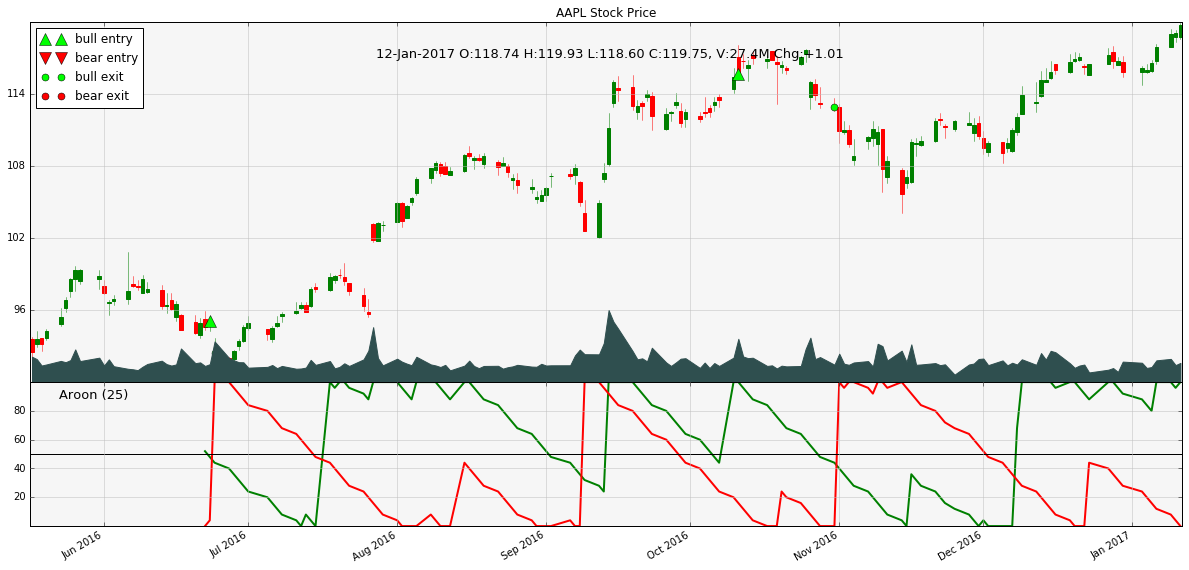

In [19]:
# Spec: And have the following 2 charts
#    - Stock chart with each bullish and bearish trade entry and exit points


plt.rc('axes', grid=True)
plt.rc('grid', color='0.75', linestyle='-', linewidth=0.5)

textsize = 13
left, width = 0.1, 0.8
# rect1 = [left, 0.7, width, 0.2]
rect2 = [left, 0.3, width, 0.5]
rect3 = [left, 0.1, width, 0.2]


fig = plt.figure(facecolor='white')
axescolor = '#f6f6f6'  # the axes background color
fillcolor = 'darkslategrey'

# ax1 = fig.add_axes(rect1, axisbg=axescolor)  # left, bottom, width, height
ax2 = fig.add_axes(rect2, axisbg=axescolor)#, sharex=ax1)
ax2t = ax2.twinx()
ax3 = fig.add_axes(rect3, axisbg=axescolor, sharex=ax2)


# plot the relative strength indicator
prices = ticker["Adj Close"] #.adj_close
# rsi = relative_strength(prices)
# fillcolor = 'darkgoldenrod'

# ax1.plot(r.date, rsi, color=fillcolor)
#ax1.axhline(70, color=fillcolor)
#ax1.axhline(30, color=fillcolor)
#ax1.fill_between(r.date, rsi, 70, where=(rsi >= 70), facecolor=fillcolor, edgecolor=fillcolor)
#ax1.fill_between(r.date, rsi, 30, where=(rsi <= 30), facecolor=fillcolor, edgecolor=fillcolor)
#ax1.text(0.6, 0.9, '>70 = overbought', va='top', transform=ax1.transAxes, fontsize=textsize)
#ax1.text(0.6, 0.1, '<30 = oversold', transform=ax1.transAxes, fontsize=textsize)
#ax1.set_ylim(0, 100)
#ax1.set_yticks([30, 70])
#ax1.text(0.025, 0.95, 'RSI (14)', va='top', transform=ax1.transAxes, fontsize=textsize)
ax2.set_title('%s Stock Price' % asset)

# plot the price and volume data
dx = ticker["Adj Close"] - ticker["Close"]
close = ticker["Close"] + dx
low = ticker["Low"] + dx
high = ticker["High"] + dx
open = ticker["Open"] + dx

candlestick_prices = zip(ticker["NumDate"], open, high, low, close)

deltas = np.zeros_like(prices)
deltas[1:] = np.diff(prices)
up = deltas > 0
matplotlib.finance.candlestick_ohlc(ax2, candlestick_prices, width = 0.75 , colorup = 'g', colordown = 'r')
# ax2.vlines(ticker["NumDate"][up], low[up], high[up], color='green', label='_nolegend_')
# ax2.vlines(ticker["NumDate"][~up], low[~up], high[~up], color='red', label='_nolegend_')
# ma20 = moving_average(prices, 20, type='simple')
# ma200 = moving_average(prices, 200, type='simple')

# linema20, = ax2.plot(r.date, ma20, color='blue', lw=2, label='MA (20)')
# linema200, = ax2.plot(r.date, ma200, color='red', lw=2, label='MA (200)')


last = ticker.tail(1)
s = '%s O:%1.2f H:%1.2f L:%1.2f C:%1.2f, V:%1.1fM Chg:%+1.2f' % (
    today.strftime('%d-%b-%Y'),
    last["Open"], last["High"],
    last["Low"], last["Close"],
    last["Volume"]*1e-6,
    last["Close"] - last["Open"])
t4 = ax2.text(0.3, 0.9, s, transform=ax2.transAxes, fontsize=textsize)

props = font_manager.FontProperties(size=10)
# leg = ax2.legend(loc='center left', shadow=True, fancybox=True, prop=props)
# leg.get_frame().set_alpha(0.5)


volume = (ticker["Adj Close"]*ticker["Volume"])/1e6  # dollar volume in millions
vmax = volume.max()
poly = ax2t.fill_between(ticker["NumDate"], volume, 0, label='Volume', facecolor=fillcolor, edgecolor=fillcolor)
ax2t.set_ylim(0, 5*vmax)
ax2t.set_yticks([])


# Plot the indicator
ax3.plot(ticker["NumDate"], ticker["Up"], color='green', lw=2)
ax3.plot(ticker["NumDate"], ticker["Down"], color='red', lw=2)
ax3.axhline(y=50, color='black', lw=1)

ax3.text(0.025, 0.95, 'Aroon (%d)' % (n), va='top',
         transform=ax3.transAxes, fontsize=textsize)

# turn off upper axis tick labels, rotate the lower ones, etc
for ax in ax2, ax2t, ax3: #ax1, 
    if ax != ax3:
        for label in ax.get_xticklabels():
            label.set_visible(False)
    else:
        for label in ax.get_xticklabels():
            label.set_rotation(30)
            label.set_horizontalalignment('right')

    ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')


class MyLocator(mticker.MaxNLocator):
    def __init__(self, *args, **kwargs):
        mticker.MaxNLocator.__init__(self, *args, **kwargs)

    def __call__(self, *args, **kwargs):
        return mticker.MaxNLocator.__call__(self, *args, **kwargs)

# at most 5 ticks, pruning the upper and lower so they don't overlap
# with other ticks
#ax2.yaxis.set_major_locator(mticker.MaxNLocator(5, prune='both'))
#ax3.yaxis.set_major_locator(mticker.MaxNLocator(5, prune='both'))

ax2.yaxis.set_major_locator(MyLocator(5, prune='both'))
ax3.yaxis.set_major_locator(MyLocator(5, prune='both'))

bull_entry = trade_log[["Entry_Date","Entry_Price"]][trade_log["Outlook"]=="Bull"].set_index("Entry_Date")
bear_entry = trade_log[["Entry_Date","Entry_Price"]][trade_log["Outlook"]=="Bear"].set_index("Entry_Date")

bull_exit = trade_log[["Exit_Date","Exit_Price"]][trade_log["Outlook"]=="Bull"].set_index("Exit_Date")
bear_exit = trade_log[["Exit_Date","Exit_Price"]][trade_log["Outlook"]=="Bear"].set_index("Exit_Date")

ax2.plot(bull_entry.index, bull_entry.values, '^', color='lime', markersize=12,
                   label='bull entry')
ax2.plot(bear_entry.index, bear_entry.values, 'v', color='red', markersize=12,
                   label='bear entry')
ax2.plot(bull_exit.index, bull_exit.values, 'o', color='lime', markersize=7,
                   label='bull exit')
ax2.plot(bear_exit.index, bear_exit.values, 'o', color='red', markersize=7,
                   label='bear exit')

ax2.legend(loc="best")

plt.show()

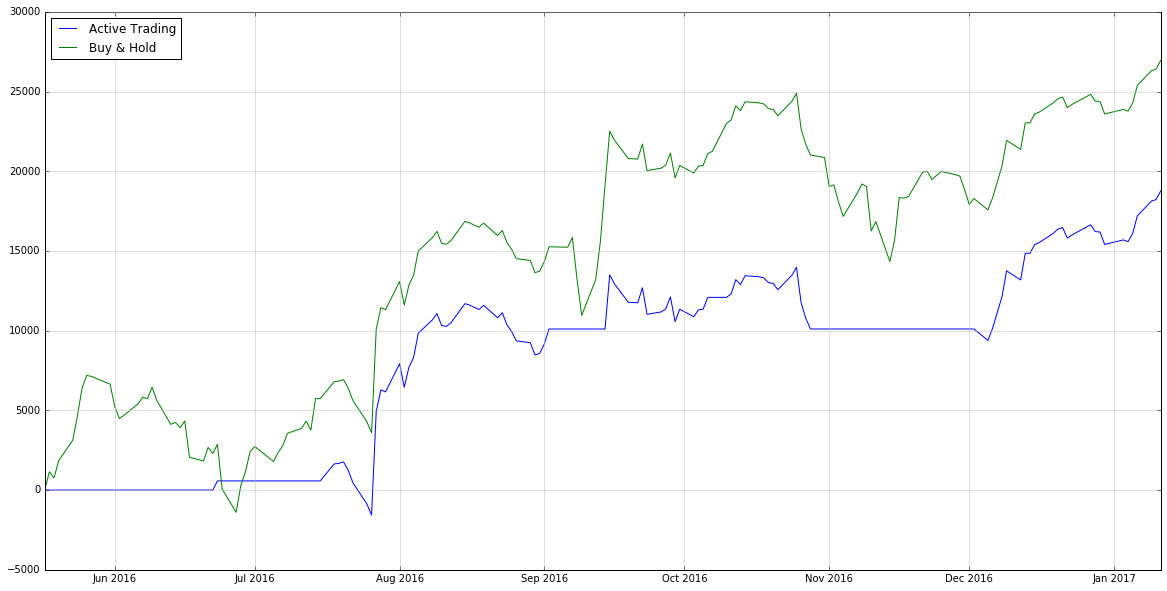

In [20]:
#    - Equity curve for the strategy compared to buy and hold strategy
plt.plot(returns["Portfolio_Value"], label='Active Trading')
plt.plot(returns["Buy_And_Hold"], label='Buy & Hold')
plt.legend(loc="upper left")
plt.show()